In [20]:
import sqlite3, pandas
import math, datetime
from itertools import groupby
import seaborn as sns
import matplotlib.pyplot as plt

def my_row_factory(cur, row):
    d={}
    for idx, col in enumerate(cur.description):
        d[col[0].lower()] = row[idx]
    return d

# conn = sqlite3.connect("../data_aggregation/options_database.db")
# conn.row_factory = my_row_factory
# cursor = conn.cursor()

PERIODS = {'1mo': 30/365, '2mo': 60/365, '3mo':91/365, '4mo':121/365, '6mo':182/365, '1yr':1, '2yr':2, '3yr':3, '5yr':5, '7yr':7, '10yr':10, '20yr':20, '30yr':30}


In [3]:
def query_date(dt):
    conn = sqlite3.connect("../data_aggregation/options_database.db")
    conn.row_factory = my_row_factory
    cursor = conn.cursor()

    query = f"""
    select 
        contract_data.*,
        price_data.close as stock_price
    from contract_data
    join price_data
    on (price_data.Symbol = contract_data.Symbol) and (price_data.date_of_close = contract_data.obs_date)
        where
            contract_data.symbol ='SPY'
            and obs_date = '{dt}'
    ;
    """
    # '2023-05-12'
    cursor.execute(query)
    data = cursor.fetchall()
    return data

In [4]:
d = '2020-02-14'
data = query_date(d)

In [6]:
len(data)

2192

In [12]:
all_options = pandas.DataFrame.from_records(data)
df = all_options[all_options.exp_date == '2020-03-20']
df.head(4)

,symbol,contract_type,strike,bid,midpoint,ask,last,volume,open_int,obs_date,exp_date,stock_price
742,SPY,call,50.0,287.52,287.74,287.97,264.02,0,0.0,2020-02-14,2020-03-20,337.6
743,SPY,call,55.0,282.53,282.75,282.97,259.04,0,0.0,2020-02-14,2020-03-20,337.6
744,SPY,call,60.0,277.54,277.76,277.98,252.38,0,0.0,2020-02-14,2020-03-20,337.6
745,SPY,call,65.0,272.55,272.77,272.99,260.68,0,0.0,2020-02-14,2020-03-20,337.6


In [23]:
df.iloc[0].stock_price

337.6

In [18]:
sns.lineplot?

Signature:
sns.lineplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    units=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    dashes=True,
    markers=None,
    style_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    seed=None,
    orient='x',
    sort=True,
    err_style='band',
    err_kws=None,
    legend='auto',
    ci='deprecated',
    ax=None,
    **kwargs,
)
Docstring:
Draw a line plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets
of the data using the `hue`, `size`, and `style` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using re

In [33]:
graph_data = df[df.strike > 250]

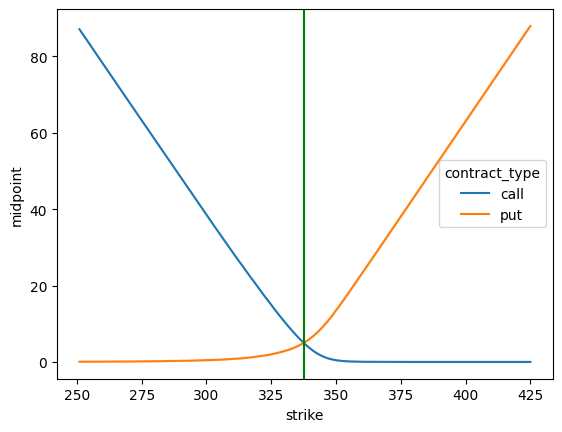

In [34]:
sns.lineplot(data=graph_data, x='strike', y='midpoint', hue='contract_type')
plt.axvline(df.iloc[0].stock_price, color='green')

In [40]:
df.stock_price - (df.midpoint + df.strike)

742      -0.14
743      -0.15
744      -0.16
745      -0.17
746      -0.18
         ...  
2187   -135.43
2188   -145.42
2189   -155.41
2190   -165.40
2191   -175.39
Length: 708, dtype: float64

In [38]:
df

,symbol,contract_type,strike,bid,midpoint,ask,last,volume,open_int,obs_date,exp_date,stock_price
742,SPY,call,50.0,287.52,287.74,287.97,264.02,0,0.0,2020-02-14,2020-03-20,337.6
743,SPY,call,55.0,282.53,282.75,282.97,259.04,0,0.0,2020-02-14,2020-03-20,337.6
744,SPY,call,60.0,277.54,277.76,277.98,252.38,0,0.0,2020-02-14,2020-03-20,337.6
745,SPY,call,65.0,272.55,272.77,272.99,260.68,0,0.0,2020-02-14,2020-03-20,337.6
746,SPY,call,70.0,267.56,267.78,268.00,262.74,0,16.0,2020-02-14,2020-03-20,337.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2187,SPY,put,405.0,67.82,68.03,68.24,94.35,0,0.0,2020-02-14,2020-03-20,337.6
2188,SPY,put,410.0,72.81,73.02,73.23,77.15,0,12.0,2020-02-14,2020-03-20,337.6
2189,SPY,put,415.0,77.80,78.01,78.22,96.70,0,0.0,2020-02-14,2020-03-20,337.6
2190,SPY,put,420.0,82.79,83.00,83.21,94.70,0,203.0,2020-02-14,2020-03-20,337.6
